In [2]:
import os
from sys import path
dir_actual = os.getcwd()
path.insert(0, 'C:/Users/guill/OneDrive/Documentos/Tesis/Proyect')

import myfuncions.randomize_f as myrand
import myfuncions.core_shell_f as cs
import myfuncions.tools_f as tools
import subprocess as sbp
import myfuncions.graphs_f as gf

coords = cs.cubeShell(14,2.775,'fcc')
atpos, eleList = cs.atpos_eleList_maker(coords,'Pt')
atpos, eleList = tools.spherical_cut(atpos, eleList, 25)

Corta esfericamente al atpos


## Prueba 1: 5% de vacancias en la superficie

In [98]:
name1 = 'p1.xyz'
atpos1 = myrand.remove_at_powrad(atpos, 0.05, 25)
atpos1, eleList1, mode1 = myrand.cambiar_elementos_prob(atpos1,{'Pt':0.38, 'Pd':0.62})
atpos1, eleList1, mode1 = myrand.pol_ab_rad_ch(atpos1, eleList1, {'Pt':0.28, 'Pd':0.45, 'Co':0.27}, 49.0, 'Co', 0.75, 0.05)
tools.show_percent(atpos1, eleList1)


Elimina aleatoriament el 0.05% de atpos para p(r)=a*x^(1/percent% -1)
fracción quitada es 0.05, p es 19.0
Cambia elementos prob a atpos
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 2.4090909090909087
0.07658544973895617 0.19120583310974487 0.4250355948546909 0.8
atomos totales : 4099
Pt : 27.93364235179312 %, 1145
Pd : 45.01097828738717 %, 1845
Co : 27.05537936081971 %, 1109


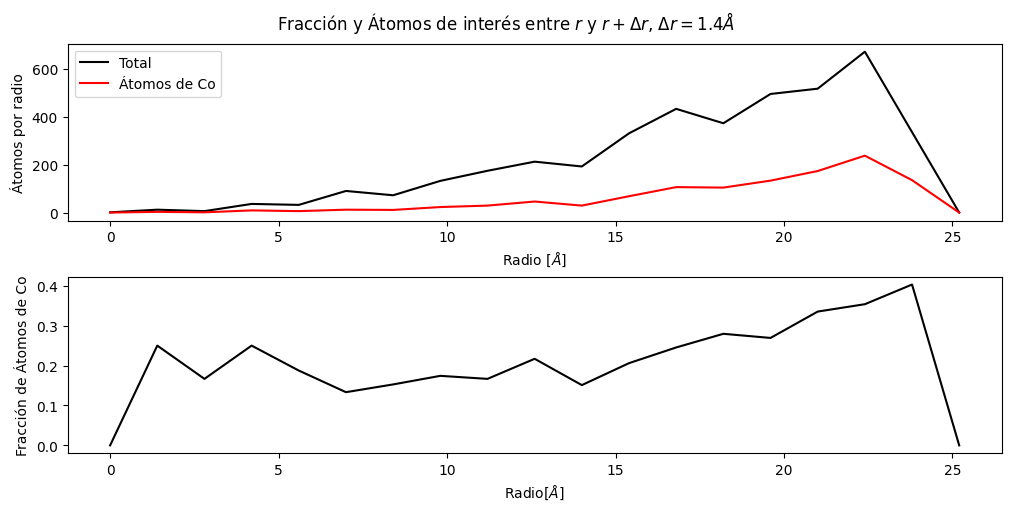

In [67]:
try: os.remove(name1)
except: pass

tools.wXYZ(atpos1, name1)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name1])

gf.plot_dump_f_y_atpr(atpos1,'Co',1.4)

In [37]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos1,eleList1,name1)

p1.ini


In [38]:
#import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name1[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name1[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
#time.sleep(160)

0

In [132]:
datpos, deleList = tools.leer_xyz(f'{name1[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name1[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name1[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 4321
Pt : 28.07220550798426 %, 1213
Pd : 44.59615829669058 %, 1927
Co : 27.331636195325157 %, 1181
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\Pruebas_vacan

  0.158439994      -7.69134998      -22.7665997              27   215143.000    
  -3.64427996      -4.31140995      -22.8896008              27   215143.000    
  0.184389994      -4.01463985      -22.6641006              27   215143.000    
        4321  atomos      9333360  pares 
 Rango de distancias    2.13125181     -   49.3235168    
 Distancias promedio    25.2321224    
 Factor de normalizacion    453967.188    



## Prueba 2: 10% de vacancias en la superficie

In [89]:
name2 = 'p2.xyz'
atpos2 = myrand.remove_at_powrad(atpos, 0.10, 25)
atpos2, eleList2, mode2 = myrand.cambiar_elementos_prob(atpos2,{'Pt':0.38, 'Pd':0.62})
atpos2, eleList2, mode2 = myrand.pol_ab_rad_ch(atpos2, eleList2, {'Pt':0.28, 'Pd':0.45, 'Co':0.27}, 48.5, 'Co', 0.75, 0.05)
tools.show_percent(atpos2, eleList2)

Elimina aleatoriament el 0.1% de atpos para p(r)=a*x^(1/percent% -1)
fracción quitada es 0.1, p es 9.0
Cambia elementos prob a atpos
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 2.260869565217391
0.072649922336173 0.19648463743169728 0.4313731937376613 0.79
atomos totales : 3864
Pt : 27.924430641821946 %, 1079
Pd : 44.7463768115942 %, 1729
Co : 27.32919254658385 %, 1056


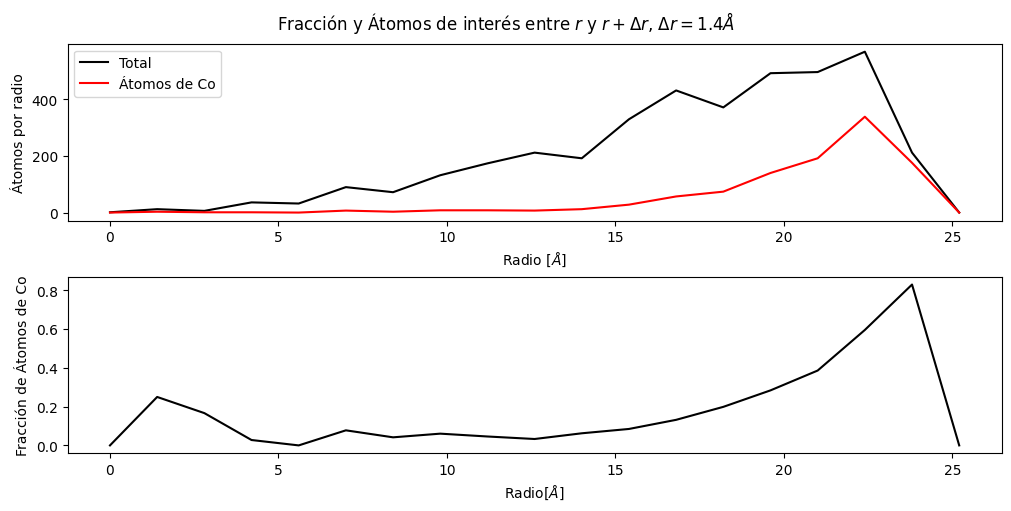

In [100]:
try: os.remove(name2)
except: pass

tools.wXYZ(atpos2, name2)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name2])

gf.plot_dump_f_y_atpr(atpos2,'Co',1.4)

In [101]:
from myfuncions.lammpin_f import wlammpin

wlammpin(atpos2,eleList2,name2)

p2.ini


In [102]:
#import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name2[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name2[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
#time.sleep(160)

0

In [103]:
datpos, deleList = tools.leer_xyz(f'{name2[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name2[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name2[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 3864
Pt : 27.924430641821946 %, 1079
Pd : 44.7463768115942 %, 1729
Co : 27.32919254658385 %, 1056
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\Pruebas_vacan

  -4.32593012      -3.06201005      -21.4948006              78   192208.000    
   3.63807988      0.266130000      -22.9172001              27   192208.000    
   7.59867001      0.195649996      -22.2546997              27   192208.000    
        3864  atomos      7463316  pares 
 Rango de distancias    2.09967661     -   47.7306023    
 Distancias promedio    24.2985840    
 Factor de normalizacion    376667.812    



## Prueba 3: 15% de vacancias en la superficie

In [126]:
name3 = 'p3.xyz'
atpos3 = myrand.remove_at_powrad(atpos, 0.15, 25)
atpos3, eleList3, mode3 = myrand.cambiar_elementos_prob(atpos3,{'Pt':0.38, 'Pd':0.62})
atpos3, eleList3, mode3 = myrand.pol_ab_rad_ch(atpos3, eleList3, {'Pt':0.28, 'Pd':0.45, 'Co':0.27}, 48, 'Co', 0.75, 0.05)
tools.show_percent(atpos3, eleList3)

Elimina aleatoriament el 0.15% de atpos para p(r)=a*x^(1/percent% -1)
fracción quitada es 0.15, p es 5.666666666666667
Cambia elementos prob a atpos
Cambia en potencia el porcentaje radial de átomos en {'Pt': 0.28, 'Pd': 0.45, 'Co': 0.27}
per es 0.27, p es 2.260869565217391
0.072649922336173 0.19648463743169728 0.4313731937376613 0.79
atomos totales : 3643
Pd : 45.209991765028825 %, 1647
Pt : 27.587153444962944 %, 1005
Co : 27.202854790008235 %, 991


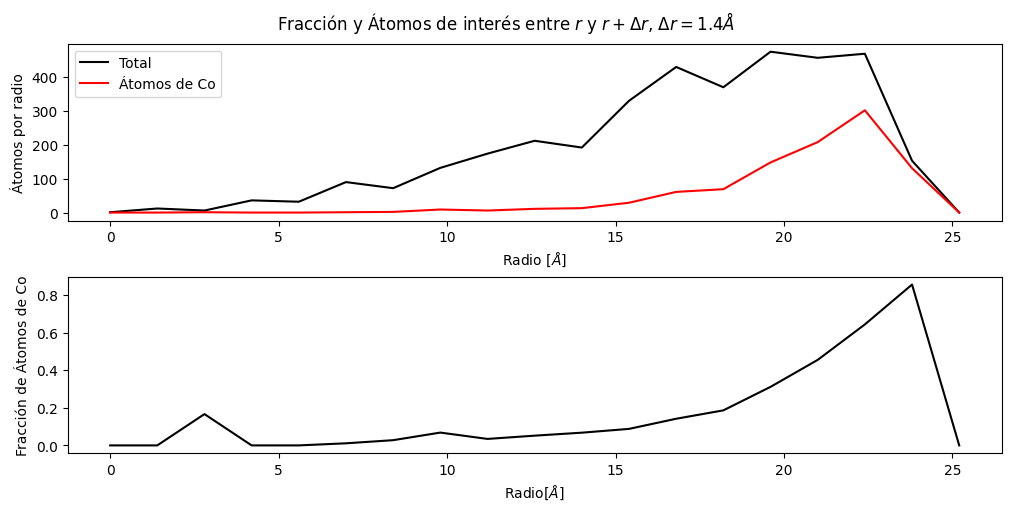

In [127]:
try: os.remove(name3)
except: pass

tools.wXYZ(atpos3, name3)
sbp.run(['java', '-jar', 'C:\\Users\\guill\\Downloads\\Jmol-16.1.41-binary\\jmol-16.1.41\\Jmol.jar', name3])

gf.plot_dump_f_y_atpr(atpos3,'Co',1.4)

In [128]:

wlammpin(atpos3,eleList3,name3)

p3.ini


In [129]:
#import time
tf = 450

input = f"""
# 2NN EAM potential in LAMMPS

 units		metal
 atom_style	atomic
 boundary	f f f

 read_data	{name3[:-4]}.ini
 pair_style	meam
 pair_coeff	* * ..\\..\\LAMMPS\\library-PtPdCo.meam Pt Pd Co ..\\..\\LAMMPS\\PtPdCo.pot Pt Pd Co
  
 neighbor	0.5 bin
 neigh_modify	every 1 delay 0 check yes once no
 velocity	all create 0.00 13478 rot yes mom yes dist gaussian
 timestep	0.005

 fix            1 all nve
 fix            2 all temp/rescale 10 0.00 0.00 1.0 1
 thermo         100
 thermo_style   custom step temp atoms pe ke etotal
 thermo_modify  lost ignore
 run 600

 unfix 2
 fix         3 all temp/berendsen 0.0 {tf} 0.1
 thermo		100
 run		3000

 unfix 3
 timestep   0.001
 thermo		100
 fix		4 all langevin {tf} {tf} 0.5 87654
 dump       4 all xyz 1 dump_temp.xyz
 undump     4
 run        1
 dump       4 all xyz 599 {name3[:-4]}_d.xyz
 run		599
"""
with open('input.in','w') as archivo:
    archivo.write(input)

os.system('start powershell -Command lmp -in input.in; Start-Sleep -s 20; exit')
#os.system('start powershell -Command lmp -in input.in')
#time.sleep(160)

0

In [130]:
datpos, deleList = tools.leer_xyz(f'{name3[:-4]}_d.xyz')
datpos, deleList = tools.cambiar_etiquetas_xyz(datpos, deleList, {1: 'Pt', 2: 'Pd', 3:'Co'})
tools.show_percent(datpos, ['Pt','Pd','Co'])
tools.wXYZ(datpos,f'{name3[:-4]}_d2.xyz')

import PDF.runner as pdf
pdf.run_pdf(f'{name3[:-4]}_d2.xyz', dir_actual, 2600,0.02)

Cambia etiquetas a "atpos"
jala
atomos totales : 3643
Pt : 27.587153444962944 %, 1005
Pd : 45.209991765028825 %, 1647
Co : 27.202854790008235 %, 991
c:\Users\guill\OneDrive\Documentos\Tesis\Proyect\26_de_abril\Pruebas_vacan

   3.88073993      -3.58663011      -22.5415001              27   180909.000    
  -1.22900000E-02   3.83264995      -22.5100002              27   180909.000    
  -5.20199013      -11.3966999      -17.4643002              27   180909.000    
        3643  atomos      6633903  pares 
 Rango de distancias    2.08855844     -   47.4215355    
 Distancias promedio    23.9226627    
 Factor de normalizacion    340216.781    



# Comparación de las PDFs

In [135]:
import pandas as pd
import numpy as np
import plotly.express as px
M = pd.DataFrame()

df_exp = pd.read_csv('../Post-PtPdCo-PDF.csv', sep = '\s+', header=None, names=['r','G(r)'])
df_exp = df_exp.replace('--',np.nan).dropna()
rest_df_exp = df_exp["G(r)"].iloc[1::2].astype(float)
rest_df_exp = rest_df_exp.reset_index(drop=True)
rest_df_exp.index += 1
M['exp'] = rest_df_exp

dx = 0.02

#M.index = M0['#r(A)']
M300 = pd.read_csv(f'{name1[:-4]}_d2.txt', sep='\s+')
M400 = pd.read_csv(f'{name2[:-4]}_d2.txt', sep='\s+')
M500 = pd.read_csv(f'{name3[:-4]}_d2.txt', sep='\s+')

M['5'] = M300['G(r)']
M['10'] = M400['G(r)']
M['15'] = M500['G(r)']

M.index = (M.index + 1)*dx

temps = [5,10,15]

for i in temps:
    a = M[M[f'{i}']== max(M[f'{i}'])].index[0]
    b = 0.29 #### Al parecer este es el originario de todo lo que yo estaba haciendo
    c = b/(float(M[f'{i}'][a]))
    M[f'{i}'] *= c
    rest = M['exp'] - M[f'{i}']
    error = np.sum(rest**2)
    error_p = np.sqrt(error/2600)
    print(f'Para {i} % el error es {error},y el error porcentual es {error_p}')




fig = px.line(M, template='simple_white', title='Pair Distribution Functions of 9 Models',
    width=1000, height=600)
fig.update_layout(
    font_family="serif",
    title_font_family="serif")
fig.update_xaxes(title_text='G(r)')
fig.update_yaxes(title_text='r [A]')
fig.show()

Para 5 % el error es 0.6573579141031971,y el error porcentual es 0.01590062787951369
Para 10 % el error es 0.6135140124997815,y el error porcentual es 0.015361215052349582
Para 15 % el error es 0.7161664854197328,y el error porcentual es 0.01659664569237889
